# Explore dataset Bike_sharing from Kaggle

## import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read csv and first visualization

In [ ]:
df = pd.read_csv('day.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

## Searching mismatches by casual + registered and total rent

In [ ]:
df["check_total"] = df["casual"] + df["registered"]
mismatched_rows = df[df["check_total"] != df["cnt"]]
mismatch_count = len(mismatched_rows)
print(mismatch_count)

## cathegorical columns unique values

In [7]:
categorical_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
unique_values = {col: df[col].unique() for col in categorical_columns}
print(unique_values)


{'season': array([1, 2, 3, 4]), 'yr': array([0, 1]), 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), 'holiday': array([0, 1]), 'weekday': array([6, 0, 1, 2, 3, 4, 5]), 'workingday': array([0, 1]), 'weathersit': array([2, 1, 3])}


## category tipes transform for relevant columns

In [10]:
df["season"] = df["season"].astype("category")
df["weekday"] = df["weekday"].astype("category")
df["weathersit"] = df["weathersit"].astype("category")
df["holiday"] = df["holiday"].astype("category")
df["workingday"] = df["workingday"].astype("category")

## normalization ranges

In [8]:
columns_norm = ["temp", "atemp", "hum", "windspeed"]
print(df[columns_norm].agg(["min", "max"]))

         temp     atemp     hum  windspeed
min  0.059130  0.079070  0.0000   0.022392
max  0.861667  0.840896  0.9725   0.507463


In [19]:

df.drop(columns=["instant"], inplace=True)


KeyError: "['instant'] not found in axis"

## checking outliers in cnt, "casual" and "regeistered" using boxplot

In [ ]:
plt.figure(figsize=(12, 5))

# Boxplot for total rentals
plt.subplot(1, 3, 1)
sns.boxplot(y=df["cnt"], color="skyblue")
plt.title("Outliers in Total Rentals (cnt)")
plt.ylabel("")

# Boxplot for casual users
plt.subplot(1, 3, 2)
sns.boxplot(y=df["casual"], color="orange")
plt.title("Outliers in Casual Users")
plt.ylabel("")

# Boxplot for registered users
plt.subplot(1, 3, 3)
sns.boxplot(y=df["registered"], color="green")
plt.title("Outliers in Registered Users")
plt.ylabel("")

plt.tight_layout()
plt.show()
# The only statistically significant outliers are found in casual rentals.
# These are associated with non-working days, favorable weather (mostly clear skies), and warm temperatures.
# Registered users show no statistical outliers, confirming their stable usage pattern.

## mapping categorical columns for easy readable

In [14]:
# Map season numbers to names
season_map = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
df["season_name"] = df["season"].map(season_map)

# Map weekday numbers to names (0 = Sunday, 6 = Saturday)
weekday_map = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}
df["weekday_name"] = df["weekday"].astype(int).map(weekday_map)

# Map weather situation
weather_map = {
    1: "Clear", 2: "Mist/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain"
}
df["weather_desc"] = df["weathersit"].astype(int).map(weather_map)

# Create 'day_type': Weekday vs Weekend
df["day_type"] = df["weekday"].astype(int).apply(lambda x: "Weekend" if x in [0, 6] else "Weekday")

## mapping weekday and plot rental per day

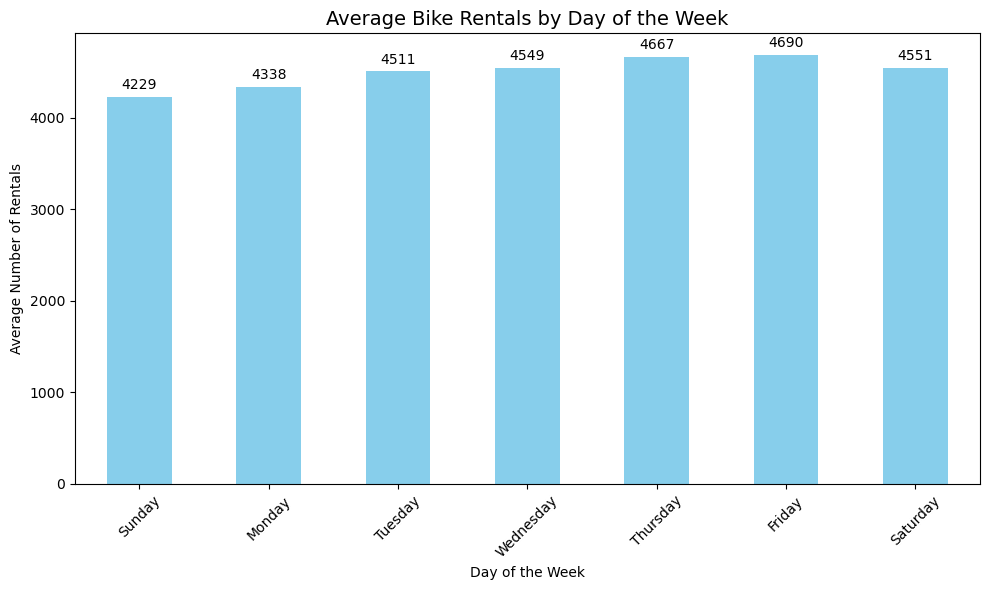

In [20]:
avg_rentals = df.groupby("weekday_name")["cnt"].mean().reindex([
    "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"
])

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = avg_rentals.plot(kind="bar", color="skyblue")
ax.set_title("Average Bike Rentals by Day of the Week", fontsize=14)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Average Number of Rentals")
ax.set_xticklabels(avg_rentals.index, rotation=45)

# Annotate each bar with its exact value
for i, v in enumerate(avg_rentals):
    ax.text(i, v + 50, f"{v:.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

## Compare weekdays and weekend

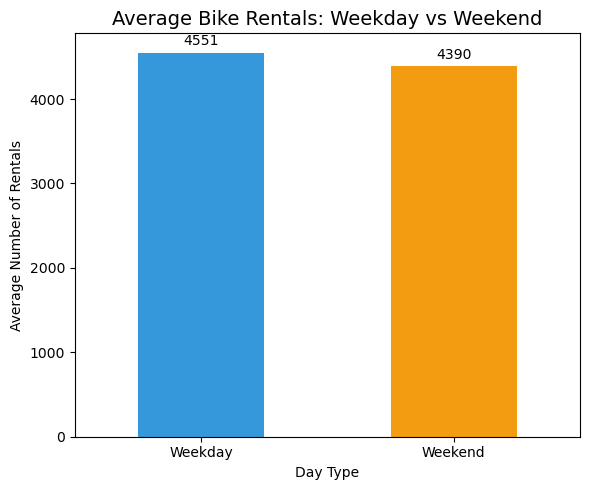

In [21]:
avg_daytype = df.groupby("day_type")["cnt"].mean().reindex(["Weekday", "Weekend"])

plt.figure(figsize=(6, 5))
ax = avg_daytype.plot(kind="bar", color=["#3498db", "#f39c12"])
ax.set_title("Average Bike Rentals: Weekday vs Weekend", fontsize=14)
ax.set_xlabel("Day Type")
ax.set_ylabel("Average Number of Rentals")
ax.set_xticklabels(avg_daytype.index, rotation=0)

# Add exact values above bars
for i, v in enumerate(avg_daytype):
    ax.text(i, v + 50, f"{v:.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

## Compare season

C:\Users\pc\AppData\Local\Temp\ipykernel_7544\1141401629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_season = df.groupby("season_name")["cnt"].mean().reindex(["Winter", "Spring", "Summer", "Fall"])


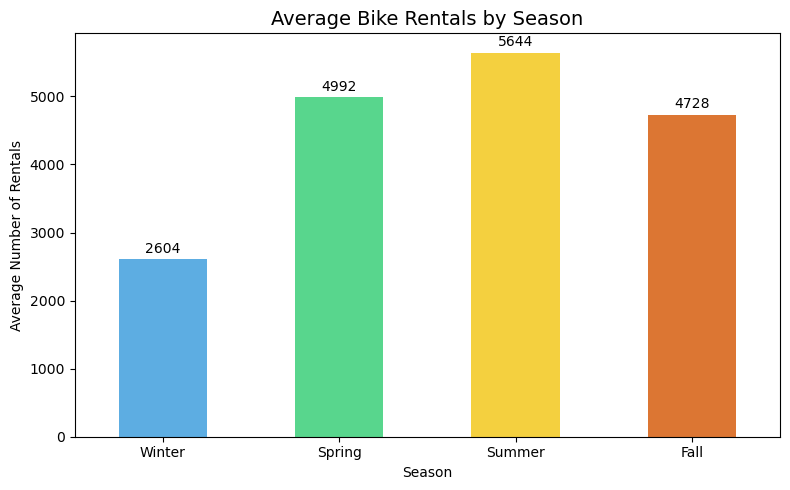

In [22]:
avg_season = df.groupby("season_name")["cnt"].mean().reindex(["Winter", "Spring", "Summer", "Fall"])

# Plot
plt.figure(figsize=(8, 5))
ax = avg_season.plot(kind="bar", color=["#5DADE2", "#58D68D", "#F4D03F", "#DC7633"])
ax.set_title("Average Bike Rentals by Season", fontsize=14)
ax.set_xlabel("Season")
ax.set_ylabel("Average Number of Rentals")
ax.set_xticklabels(avg_season.index, rotation=0)

# Add values above bars
for i, v in enumerate(avg_season):
    ax.text(i, v + 50, f"{v:.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()